In [1]:
import urllib, json
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt

# Gym street network

data ref: Ravenna, November 2021  
data source: [Ravenna opendata](https://opendata.comune.ra.it/organization/comune-ravenna)  

**Indicator**: the aim of this indicator is to show the coverage of gyms. To do so it calculates the street network around the service (500m).  
**Limitations**: none.

In [2]:
points_url = 'https://opendata.comune.ra.it/dataset/35ffc0cc-0648-4411-bc4c-863096e899ad/resource/8363f296-8d09-4431-9dd6-5ffe81c9b7e2/download/servizi-ricreativi.geojson'
points_response = urllib.request.urlopen(points_url)
points_data = json.loads(points_response.read())
# print(points_data)
points = gpd.GeoDataFrame.from_features(points_data) # see data/sport.geojson
points = points[['TIPO', 'TOPONIMO', 'CIVICO', 'NOME_AT', 'geometry']]
points = points[ points['TIPO'] == 'Palestra' ].reset_index( drop = True )
points = points.drop( columns = ['TIPO'] )
points = points.rename( columns = { 'NOME_AT' : 'frazione' } )
# print(points.crs)
points = points.set_crs('epsg:3004')
points = points.to_crs( epsg = 4326 ) # WGS84 for osmnx
print(points.head(3))
print('tot gyms:', len(points.index)) # faster than points.shape[0]

                 TOPONIMO CIVICO     frazione                   geometry
0            VIA RUBICONE     46  RAVENNA SUD  POINT (12.21035 44.40898)
1  VIALE QUATTRO NOVEMBRE    86A     DEL MARE  POINT (12.27434 44.48251)
2             VIA TRIESTE    438     DEL MARE  POINT (12.27393 44.48440)
tot gyms: 29


In [3]:
place = 'Ravenna, Ravenna, Italy'
ra_pol= ox.geocode_to_gdf( place )
ra_st = ox.graph_from_place( place, network_type = "drive" )
nodes, edges = ox.graph_to_gdfs(ra_st)

C:\Users\valen\anaconda3\envs\geoqol\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
C:\Users\valen\anaconda3\envs\geoqol\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


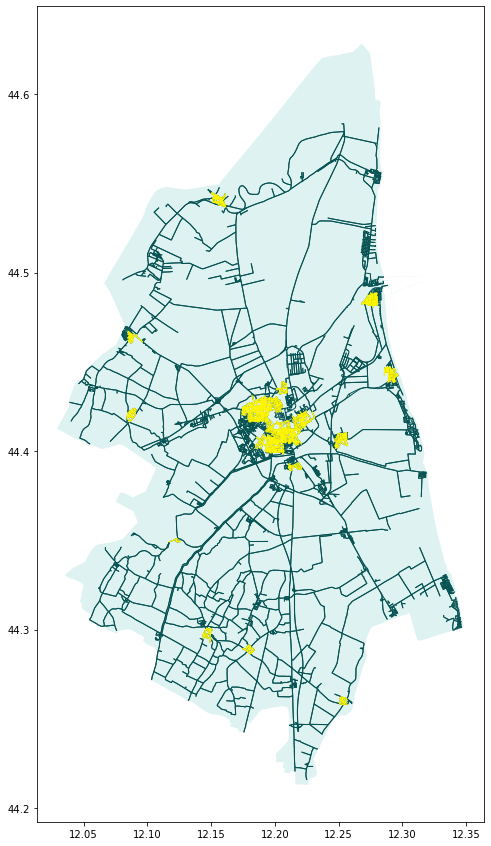

In [4]:
fig, ax = plt.subplots( figsize = (20, 15) )
ra_pol.plot( ax = ax, facecolor = '#dff2f2' )
edges.plot( ax = ax, linewidth = 1, edgecolor = '#065252' )

for index, row in points.iterrows():
    gym_point = (row.geometry.y, row.geometry.x) # points.geometry[0].y, points.geometry[0].x == lat, lon
    gym_st = ox.graph_from_point( gym_point, dist = 500, network_type = 'drive' )
    gym_nodes, gym_edges = ox.graph_to_gdfs(gym_st)
    gym_edges.plot( ax = ax, linewidth = 1, edgecolor = '#fff700')